In [2]:
import pandas as pd
import numpy as mnp
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [3]:
data=pd.read_csv("bank-full.csv",sep=';')
data

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [4]:
data.shape

(45211, 17)

In [5]:
data.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [6]:
data.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [7]:
pd.DataFrame(data['job'].value_counts())

job
blue-collar    9732
management     9458
technician     7597
admin.         5171
services       4154
retired        2264
self-employed  1579
entrepreneur   1487
unemployed     1303
housemaid      1240
student         938
unknown         288

In [8]:
data['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [9]:
data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [10]:
data['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [11]:
data=pd.get_dummies(data,columns=['job','marital','education','month','poutcome','contact'])
data

age default  balance housing loan  day  duration  campaign  pdays  \
0       58      no     2143     yes   no    5       261         1     -1   
1       44      no       29     yes   no    5       151         1     -1   
2       33      no        2     yes  yes    5        76         1     -1   
3       47      no     1506     yes   no    5        92         1     -1   
4       33      no        1      no   no    5       198         1     -1   
...    ...     ...      ...     ...  ...  ...       ...       ...    ...   
45206   51      no      825      no   no   17       977         3     -1   
45207   71      no     1729      no   no   17       456         2     -1   
45208   72      no     5715      no   no   17      1127         5    184   
45209   57      no      668      no   no   17       508         4     -1   
45210   37      no     2971      no   no   17       361         2    188   

       previous  ... month_nov  month_oct  month_sep  poutcome_failure  \
0             0  ...         0          0          0                 0   
1             0  ...         0          0          0                 0   
2             0  ...         0          0          0                 0   
3             0  ...         0          0          0                 0   
4             0  ...         0          0          0                 0   
...         ...  ...       ...        ...        ...               ...   
45206         0  ...         1          0          0                 0   
45207         0  ...         1          0          0                 0   
45208         3  ...         1          0          0                 0   
45209         0  ...         1          0          0                 0   
45210        11  ...         1          0          0                 0   

       poutcome_other  poutcome_success  poutcome_unknown  contact_cellular  \
0                   0                 0                 1                 0   
1                   0                 0                 1                 0   
2                   0                 0                 1                 0   
3                   0                 0                 1                 0   
4                   0                 0                 1                 0   
...               ...               ...               ...               ...   
45206               0                 0                 1                 1   
45207               0                 0                 1                 1   
45208               0                 1                 0                 1   
45209               0                 0                 1                 0   
45210               1                 0                 0                 1   

       contact_telephone  contact_unknown  
0                      0                1  
1                      0                1  
2                      0                1  
3                      0                1  
4                      0                1  
...                  ...              ...  
45206                  0                0  
45207                  0                0  
45208                  0                0  
45209                  1                0  
45210                  0                0  

[45211 rows x 49 columns]

In [12]:
##Label Encoding for columns housing,loan,default,y
encoder=LabelEncoder()
columns=['housing','loan','default','y']
for i in columns:
    data[i]=encoder.fit_transform(data[i])
data

age  default  balance  housing  loan  day  duration  campaign  pdays  \
0       58        0     2143        1     0    5       261         1     -1   
1       44        0       29        1     0    5       151         1     -1   
2       33        0        2        1     1    5        76         1     -1   
3       47        0     1506        1     0    5        92         1     -1   
4       33        0        1        0     0    5       198         1     -1   
...    ...      ...      ...      ...   ...  ...       ...       ...    ...   
45206   51        0      825        0     0   17       977         3     -1   
45207   71        0     1729        0     0   17       456         2     -1   
45208   72        0     5715        0     0   17      1127         5    184   
45209   57        0      668        0     0   17       508         4     -1   
45210   37        0     2971        0     0   17       361         2    188   

       previous  ...  month_nov  month_oct  month_sep  poutcome_failure  \
0             0  ...          0          0          0                 0   
1             0  ...          0          0          0                 0   
2             0  ...          0          0          0                 0   
3             0  ...          0          0          0                 0   
4             0  ...          0          0          0                 0   
...         ...  ...        ...        ...        ...               ...   
45206         0  ...          1          0          0                 0   
45207         0  ...          1          0          0                 0   
45208         3  ...          1          0          0                 0   
45209         0  ...          1          0          0                 0   
45210        11  ...          1          0          0                 0   

       poutcome_other  poutcome_success  poutcome_unknown  contact_cellular  \
0                   0                 0                 1                 0   
1                   0                 0                 1                 0   
2                   0                 0                 1                 0   
3                   0                 0                 1                 0   
4                   0                 0                 1                 0   
...               ...               ...               ...               ...   
45206               0                 0                 1                 1   
45207               0                 0                 1                 1   
45208               0                 1                 0                 1   
45209               0                 0                 1                 0   
45210               1                 0                 0                 1   

       contact_telephone  contact_unknown  
0                      0                1  
1                      0                1  
2                      0                1  
3                      0                1  
4                      0                1  
...                  ...              ...  
45206                  0                0  
45207                  0                0  
45208                  0                0  
45209                  1                0  
45210                  0                0  

[45211 rows x 49 columns]

In [13]:
pd.set_option("display.max_columns",None)

In [14]:
data

age  default  balance  housing  loan  day  duration  campaign  pdays  \
0       58        0     2143        1     0    5       261         1     -1   
1       44        0       29        1     0    5       151         1     -1   
2       33        0        2        1     1    5        76         1     -1   
3       47        0     1506        1     0    5        92         1     -1   
4       33        0        1        0     0    5       198         1     -1   
...    ...      ...      ...      ...   ...  ...       ...       ...    ...   
45206   51        0      825        0     0   17       977         3     -1   
45207   71        0     1729        0     0   17       456         2     -1   
45208   72        0     5715        0     0   17      1127         5    184   
45209   57        0      668        0     0   17       508         4     -1   
45210   37        0     2971        0     0   17       361         2    188   

       previous  y  job_admin.  job_blue-collar  job_entrepreneur  \
0             0  0           0                0                 0   
1             0  0           0                0                 0   
2             0  0           0                0                 1   
3             0  0           0                1                 0   
4             0  0           0                0                 0   
...         ... ..         ...              ...               ...   
45206         0  1           0                0                 0   
45207         0  1           0                0                 0   
45208         3  1           0                0                 0   
45209         0  0           0                1                 0   
45210        11  0           0                0                 1   

       job_housemaid  job_management  job_retired  job_self-employed  \
0                  0               1            0                  0   
1                  0               0            0                  0   
2                  0               0            0                  0   
3                  0               0            0                  0   
4                  0               0            0                  0   
...              ...             ...          ...                ...   
45206              0               0            0                  0   
45207              0               0            1                  0   
45208              0               0            1                  0   
45209              0               0            0                  0   
45210              0               0            0                  0   

       job_services  job_student  job_technician  job_unemployed  job_unknown  \
0                 0            0               0               0            0   
1                 0            0               1               0            0   
2                 0            0               0               0            0   
3                 0            0               0               0            0   
4                 0            0               0               0            1   
...             ...          ...             ...             ...          ...   
45206             0            0               1               0            0   
45207             0            0               0               0            0   
45208             0            0               0               0            0   
45209             0            0               0               0            0   
45210             0            0               0               0            0   

       marital_divorced  marital_married  marital_single  education_primary  \
0                     0                1               0                  0   
1                     0                0               1                  0   
2                     0                1               0                  0   
3                     0                1               0                  0

In [43]:
x=pd.concat([data.iloc[:,0:10],data.iloc[:,11:]],axis=1)
y=data.iloc[:,10]
logistic_model=LogisticRegression()
logistic_model=logistic_model.fit(x,y)

C:\Users\Swapna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
y_pred=logistic_model.predict(x)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [45]:
model_prob=logistic_model.predict_proba(x)
pd.set_option("display.max_rows",None)
model_prob

array([[0.95908689, 0.04091311],
       [0.97699703, 0.02300297],
       [0.9827374 , 0.0172626 ],
       ...,
       [0.36658427, 0.63341573],
       [0.93084641, 0.06915359],
       [0.8729673 , 0.1270327 ]])

In [46]:
values=pd.DataFrame({'Actual Values':y,'Predicted Values':y_pred})
values

Actual Values  Predicted Values
0                  0                 0
1                  0                 0
2                  0                 0
3                  0                 0
4                  0                 0
5                  0                 0
6                  0                 0
7                  0                 0
8                  0                 0
9                  0                 0
10                 0                 0
11                 0                 0
12                 0                 0
13                 0                 0
14                 0                 0
15                 0                 0
16                 0                 0
17                 0                 0
18                 0                 0
19                 0                 0
20                 0                 0
21                 0                 0
22                 0                 0
23                 0                 0
24                 0                 0
25                 0                 0
26                 0                 0
27                 0                 0
28                 0                 0
29                 0                 0
30                 0                 0
31                 0                 0
32                 0                 0
33                 0                 0
34                 0                 0
35                 0                 0
36                 0                 0
37                 0                 1
38                 0                 0
39                 0                 0
40                 0                 0
41                 0                 0
42                 0                 0
43                 0                 1
44                 0                 0
45                 0                 0
46                 0                 0
47                 0                 0
48                 0                 0
49                 0                 0
50                 0                 0
51                 0                 0
52                 0                 0
53                 0                 0
54                 0                 0
55                 0                 0
56                 0                 0
57                 0                 0
58                 0                 0
59                 0                 1
60                 0                 0
61                 0                 0
62                 0                 0
63                 0                 0
64                 0                 0
65                 0                 0
66                 0                 0
67                 0                 0
68                 0                 0
69                 0                 0
70                 0                 0
71                 0                 0
72                 0                 0
73                 0                 0
74                 0                 0
75                 0                 0
76                 0                 0
77                 0                 0
78                 0                 0
79                 0                 0
80                 0                 0
81                 0                 0
82                 0                 0
83                 1                 0
84                 0                 0
85                 0                 0
86                 1                 1
87                 1                 1
88                 0                 0
89                 0                 0
90                 0                 0
91                 0                 0
92                 0                 0
93                 0                 0
94                 0                 0
95                 0                 0
96                 0                 0
97                 0                 0
98                 0                 0
99                 0                 0
100                0                 0
101                0         

In [47]:
##Creating confusion matrix to determine the accuracy
confusionmatrix=confusion_matrix(y,y_pred)
confusionmatrix

array([[39195,   727],
       [ 4175,  1114]], dtype=int64)

In [48]:
pd.crosstab(y,y_pred)

col_0      0     1
y                 
0      39195   727
1       4175  1114

In [49]:
accuracy=sum(y==y_pred)/data.shape[0]
accuracy

0.8915750591670168

In [50]:
from sklearn.metrics import classification_report
report=classification_report(y,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.61      0.21      0.31      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



In [71]:
##CAlculating area under curve using roc_auc_score method:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
auc=roc_auc_score(y,y_pred)
auc

0.5962076583465191

In [72]:
fpr,tpr,thresholds=roc_curve(y,model_prob[:,1])
fpr,tpr,thresholds

(array([0.00000000e+00, 2.50488452e-05, 5.00976905e-05, ...,
        9.98196483e-01, 9.98196483e-01, 1.00000000e+00]),
 array([0.        , 0.        , 0.        , ..., 0.99981093, 1.        ,
        1.        ]),
 array([1.99999975e+00, 9.99999753e-01, 9.99982934e-01, ...,
        1.89663338e-07, 1.87163661e-07, 5.49497333e-15]))

Text(0.5, 1.0, 'Reciever Operating Curve')

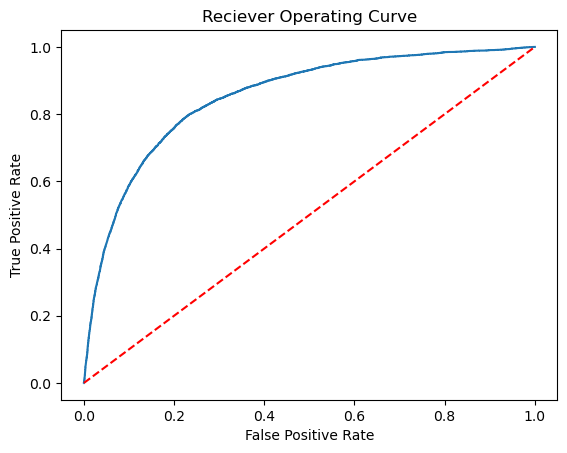

In [53]:
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("Reciever Operating Curve")

## Hyperparameter Tuning

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [79]:
hyperparameters={'C':[0.1,1,0.01],'penalty':['l1','l2']}


In [34]:
logistic_model=LogisticRegression()

In [80]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(logistic_model,hyperparameters,cv=5)
grid_search.fit(x_train,y_train)

C:\Users\Swapna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Swapna\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 0.01], 'penalty': ['l1', 'l2']})

In [81]:
grid_search.best_params_,grid_search.best_score_

({'C': 1, 'penalty': 'l2'}, 0.8920040627234535)

In [82]:
grid_model=grid_search.best_estimator_
grid_model

LogisticRegression(C=1)

In [83]:
grid_model_prob=grid_model.predict_proba(x_test)
grid_model_prob

array([[0.97841081, 0.02158919],
       [0.96052561, 0.03947439],
       [0.84392012, 0.15607988],
       ...,
       [0.97439822, 0.02560178],
       [0.98230793, 0.01769207],
       [0.94867585, 0.05132415]])

In [84]:
y_pred_grid=grid_model.predict(x_test)
y_pred_grid

array([0, 0, 0, ..., 0, 0, 0])

In [85]:
conf_matrix=confusion_matrix(y_test,y_pred_grid)
conf_matrix

array([[7792,  160],
       [ 844,  247]], dtype=int64)

In [86]:
pd.crosstab(y_test,y_pred_grid)

col_0     0    1
y               
0      7792  160
1       844  247

In [92]:
report=classification_report(y_test,y_pred_grid)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.61      0.23      0.33      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.60      0.63      9043
weighted avg       0.87      0.89      0.87      9043



## accuracy=89% from above report

In [88]:
## Calculate area under curve
auc=roc_auc_score(y_test,y_pred_grid)
auc

0.6031385379186207

## Area under curve is increased from 59.6 to 60%

In [89]:
tpr,fpr,thresholds=roc_curve(y_test,grid_model_prob[:,1])
tpr,fpr,thresholds

(array([0.00000000e+00, 0.00000000e+00, 3.77263581e-04, ...,
        9.92957746e-01, 9.92957746e-01, 1.00000000e+00]),
 array([0.00000000e+00, 9.16590284e-04, 9.16590284e-04, ...,
        9.99083410e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.99979837e+00, 9.99798367e-01, 9.94301515e-01, ...,
        6.51088604e-05, 6.44270004e-05, 9.28313791e-10]))

Text(0.5, 1.0, 'Reciever Operating Curve')

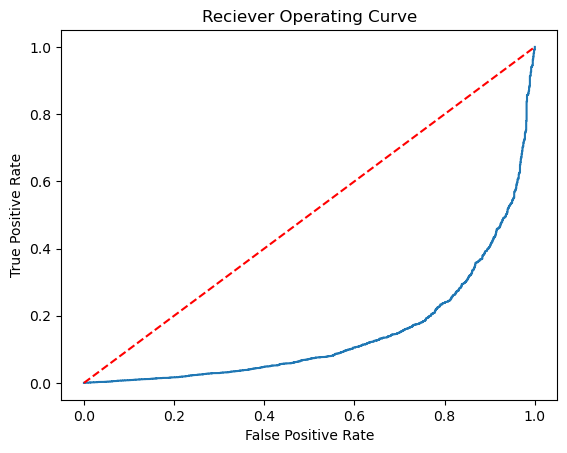

In [90]:
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("Reciever Operating Curve")